# Import needed libraries

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# DataFrames intailization

In [4]:
df_payment = pd.read_csv("DIM_PAYMENT.csv")
df_user = pd.read_csv("DIM_USER.csv")
df_location = pd.read_csv("DIM_LOCATION.csv")
df_calender = pd.read_csv("DIM_CALENDAR.csv")
df_fact_request = pd.read_csv("FCT_REQUEST.csv")

In [5]:
df_payment.head(20)

,s_payment,payment_method_id,method_name,payment_status_id,status_name,processing_date,record_hash
0,0,1,Apple Pay,1,Completed,2024-10-14 00:24:40,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...
1,1,1,Apple Pay,2,Failed,2024-10-14 00:24:40,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...
2,2,1,Apple Pay,3,Pending,2024-10-14 00:24:40,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...
3,3,1,Apple Pay,4,Refunded,2024-10-14 00:24:40,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...
4,4,2,Cash,1,Completed,2024-10-14 00:24:40,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...
5,5,2,Cash,2,Failed,2024-10-14 00:24:40,ef2d127de37b942baad06145e54b0c619a1f22327b2ebb...
6,6,2,Cash,3,Pending,2024-10-14 00:24:40,e7f6c011776e8db7cd330b54174fd76f7d0216b612387a...
7,7,2,Cash,4,Refunded,2024-10-14 00:24:40,7902699be42c8a8e46fbbb4501726517e86b22c56a189f...
8,8,3,Credit Card,1,Completed,2024-10-14 00:24:40,2c624232cdd221771294dfbb310aca000a0df6ac8b66b6...
9,9,3,Credit Card,2,Failed,2024-10-14 00:24:40,19581e27de7ced00ff1ce50b2047e7a567c76b1cbaebab...


In [7]:
df_user.head()

,user_id,full_name,email,phone_number,vehicle_id,vehicle_make,vehicle_model,vehicle_year,vehicle_color,vehicle_license_plate,processing_date,record_hash
0,5.0,Aaron Aguilar,anthony78@example.org,(867) 762-3031,Passenger,Passenger,Passenger,Passenger,Passenger,Passenger,2024-10-14 00:24:25,a966dd203faf1291c7d885d6c3cfa48af2c6eb5d28f1fb...
1,15.0,Aaron Anderson,hillkeith@example.org,(702) 666-9955,Passenger,Passenger,Passenger,Passenger,Passenger,Passenger,2024-10-14 00:24:25,371c7e6bc6c0577b1b02ff759901734c880a87a02ccd3e...
2,19.0,Aaron Anderson,wgreen@example.org,(266) 834-3104,Passenger,Passenger,Passenger,Passenger,Passenger,Passenger,2024-10-14 00:24:25,62982b7b962840055bede02779ce12077550d39c2e867d...
3,41.0,Aaron Barrett,reedjonathan@example.com,(550) 424-5055,Passenger,Passenger,Passenger,Passenger,Passenger,Passenger,2024-10-14 00:24:25,887259d6e234119a8809cac65f1e6c204960d99f25fde2...
4,43.0,Aaron Barton,bakerrandy@example.net,(639) 407-8731,Passenger,Passenger,Passenger,Passenger,Passenger,Passenger,2024-10-14 00:24:25,1d9540b977c12491477257b42e19fa89021b762393aa45...


In [8]:
df_location.head()

,location_id,latitude,longitude,processing_date,record_hash
0,8554.0,40.702812,-74.011444,2024-10-14 00:24:36,0013fa1710b8b0e4816d6eaad9668dab6dfa7ea9f1d072...
1,1619202.0,40.769959,-73.966736,2024-10-14 00:24:36,0256aabe33063198514fae9dbb5ea82781a0e506f75efd...
2,28571.0,40.732937,-74.006516,2024-10-14 00:24:36,0274ae262499149a0abbf4827944c8f94d6c6674639df7...
3,1610794.0,40.756802,-73.979889,2024-10-14 00:24:36,034a96e871e7385c325a61459bdf05e3eccdfc7309c523...
4,1438031.0,40.783497,-73.952759,2024-10-14 00:24:36,03927f1326edb53fda0b9ee4b9ce8280958df4dd6ba7b9...


In [9]:
df_calender.head()

,date_key,full_date,day,day_name,day_of_week,week_of_year,month,month_name,quarter,year,is_weekend,is_holiday,fiscal_month,fiscal_quarter,fiscal_year,processing_date,record_hash
0,20150101,2015-01-01,1,Thursday,5,1,1,January,1,2015,0,0,1,1,2015,2024-10-14 00:24:36,25e72b3562566d8db0dc10f5e2e3f2931a5ccfde171089...
1,20150102,2015-01-02,2,Friday,6,1,1,January,1,2015,0,0,1,1,2015,2024-10-14 00:24:36,91278912f563e17f52156c3ad97772ca1af6046bcee559...
2,20150103,2015-01-03,3,Saturday,7,1,1,January,1,2015,1,0,1,1,2015,2024-10-14 00:24:36,07651a4fb5f737994b5c60b96fbbb745295f6560ae66c3...
3,20150104,2015-01-04,4,Sunday,1,1,1,January,1,2015,1,0,1,1,2015,2024-10-14 00:24:36,dc8af668baa17cbffabfeb6fe5d18014594f551a6e71a9...
4,20150105,2015-01-05,5,Monday,2,2,1,January,1,2015,0,0,1,1,2015,2024-10-14 00:24:36,326fe0c936451cb48ac1022bbae82d053a6f5f697a07f8...


In [10]:
df_fact_request.head()

,driver_id,passenger_id,pickup_location_id,dropoff_location_id,request_datekey,accept_datekey,trip_start_datekey,trip_end_datekey,s_payment,trip_distance,base_fare,extra_fare,mta_tax,tip_amount,tolls_amount,improvement_surcharge,record_hash
0,701949,313,1452,91945,20150102,20150102,20150102,20150102,15,1.78,10.0,1.0,0.5,0.0,0.0,0.3,46ddae43081620d90cca5a74689db68c1309b13d87b868...
1,702009,1176,492507,370536,20150111,20150111,20150111,20150111,8,1.84,9.0,0.0,0.5,0.0,0.0,0.3,9f400b6274b543381b1ab3b40a3413634d49f2386dfe85...
2,703511,776,388263,529432,20150114,20150114,20150114,20150114,17,3.52,12.5,0.5,0.5,2.0,0.0,0.3,a227e3fc5cb6397183864ed83612323f11411e1071bd22...
3,703822,3308,257103,95013,20150112,20150112,20150112,20150112,23,0.90,8.5,0.0,0.5,1.5,0.0,0.3,a820fd18e387e6a248e332f0535284e782ade4a83c9ab6...
4,705695,3473,157625,43153,20150114,20150114,20150114,20150114,15,1.61,8.0,0.0,0.5,1.6,0.0,0.3,3aa36a45ea666b613a3bb24f6561c90cb44251fd8e6847...


# The propused model aim to create dynamic pricing prediction

## 1-Data cleaning

In [11]:
df_payment.head()

,s_payment,payment_method_id,method_name,payment_status_id,status_name,processing_date,record_hash
0,0,1,Apple Pay,1,Completed,2024-10-14 00:24:40,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...
1,1,1,Apple Pay,2,Failed,2024-10-14 00:24:40,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...
2,2,1,Apple Pay,3,Pending,2024-10-14 00:24:40,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...
3,3,1,Apple Pay,4,Refunded,2024-10-14 00:24:40,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...
4,4,2,Cash,1,Completed,2024-10-14 00:24:40,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...


In [12]:
#handling the missing values
print(df_payment.isnull().sum())

s_payment            0
payment_method_id    0
method_name          0
payment_status_id    0
status_name          0
processing_date      0
record_hash          0
dtype: int64


In [13]:
df_payment.shape

(24, 7)

In [14]:
#converting the data into the suitable format
df_calender['full_date'] = pd.to_datetime(df_calender['full_date'], format='%Y-%m-%d')
df_fact_request['request_datekey'] = pd.to_datetime(df_fact_request['request_datekey'], format='%Y%m%d')

In [15]:
df_calender.head()

,date_key,full_date,day,day_name,day_of_week,week_of_year,month,month_name,quarter,year,is_weekend,is_holiday,fiscal_month,fiscal_quarter,fiscal_year,processing_date,record_hash
0,20150101,2015-01-01,1,Thursday,5,1,1,January,1,2015,0,0,1,1,2015,2024-10-14 00:24:36,25e72b3562566d8db0dc10f5e2e3f2931a5ccfde171089...
1,20150102,2015-01-02,2,Friday,6,1,1,January,1,2015,0,0,1,1,2015,2024-10-14 00:24:36,91278912f563e17f52156c3ad97772ca1af6046bcee559...
2,20150103,2015-01-03,3,Saturday,7,1,1,January,1,2015,1,0,1,1,2015,2024-10-14 00:24:36,07651a4fb5f737994b5c60b96fbbb745295f6560ae66c3...
3,20150104,2015-01-04,4,Sunday,1,1,1,January,1,2015,1,0,1,1,2015,2024-10-14 00:24:36,dc8af668baa17cbffabfeb6fe5d18014594f551a6e71a9...
4,20150105,2015-01-05,5,Monday,2,2,1,January,1,2015,0,0,1,1,2015,2024-10-14 00:24:36,326fe0c936451cb48ac1022bbae82d053a6f5f697a07f8...


In [16]:
df_fact_request.head()

,driver_id,passenger_id,pickup_location_id,dropoff_location_id,request_datekey,accept_datekey,trip_start_datekey,trip_end_datekey,s_payment,trip_distance,base_fare,extra_fare,mta_tax,tip_amount,tolls_amount,improvement_surcharge,record_hash
0,701949,313,1452,91945,2015-01-02,20150102,20150102,20150102,15,1.78,10.0,1.0,0.5,0.0,0.0,0.3,46ddae43081620d90cca5a74689db68c1309b13d87b868...
1,702009,1176,492507,370536,2015-01-11,20150111,20150111,20150111,8,1.84,9.0,0.0,0.5,0.0,0.0,0.3,9f400b6274b543381b1ab3b40a3413634d49f2386dfe85...
2,703511,776,388263,529432,2015-01-14,20150114,20150114,20150114,17,3.52,12.5,0.5,0.5,2.0,0.0,0.3,a227e3fc5cb6397183864ed83612323f11411e1071bd22...
3,703822,3308,257103,95013,2015-01-12,20150112,20150112,20150112,23,0.90,8.5,0.0,0.5,1.5,0.0,0.3,a820fd18e387e6a248e332f0535284e782ade4a83c9ab6...
4,705695,3473,157625,43153,2015-01-14,20150114,20150114,20150114,15,1.61,8.0,0.0,0.5,1.6,0.0,0.3,3aa36a45ea666b613a3bb24f6561c90cb44251fd8e6847...


In [17]:
df_payment_info = pd.merge(df_fact_request, df_payment, how='left', left_on='s_payment', right_on='s_payment')

In [18]:
df_payment_info["method_name"].describe()

count         332533
unique             6
top       Debit Card
freq           55518
Name: method_name, dtype: object

In [19]:
print(df_payment_info.isnull().sum())

driver_id                0
passenger_id             0
pickup_location_id       0
dropoff_location_id      0
request_datekey          0
accept_datekey           0
trip_start_datekey       0
trip_end_datekey         0
s_payment                0
trip_distance            0
base_fare                0
extra_fare               0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
record_hash_x            0
payment_method_id        0
method_name              0
payment_status_id        0
status_name              0
processing_date          0
record_hash_y            0
dtype: int64


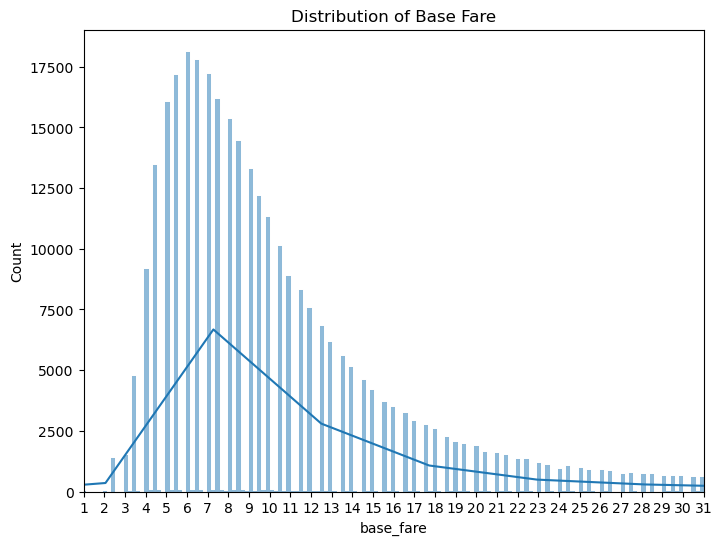

In [20]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Create the histogram with a kernel density estimate (KDE)
ax = sns.histplot(df_payment_info['base_fare'], kde=True)

# Set x-axis limits and ticks
ax.set_xlim(1, 31)  # Limit the x-axis from 1 to 31
ax.set_xticks(range(1, 32))  # Set the x-ticks from 1 to 31

# Set the title of the plot
plt.title('Distribution of Base Fare')

# Show the plot
plt.show()


In [21]:
df_payment_info["base_fare"]

0         10.0
1          9.0
2         12.5
3          8.5
4          8.0
          ... 
332528     5.5
332529     8.5
332530    18.5
332531     8.5
332532     7.5
Name: base_fare, Length: 332533, dtype: float64

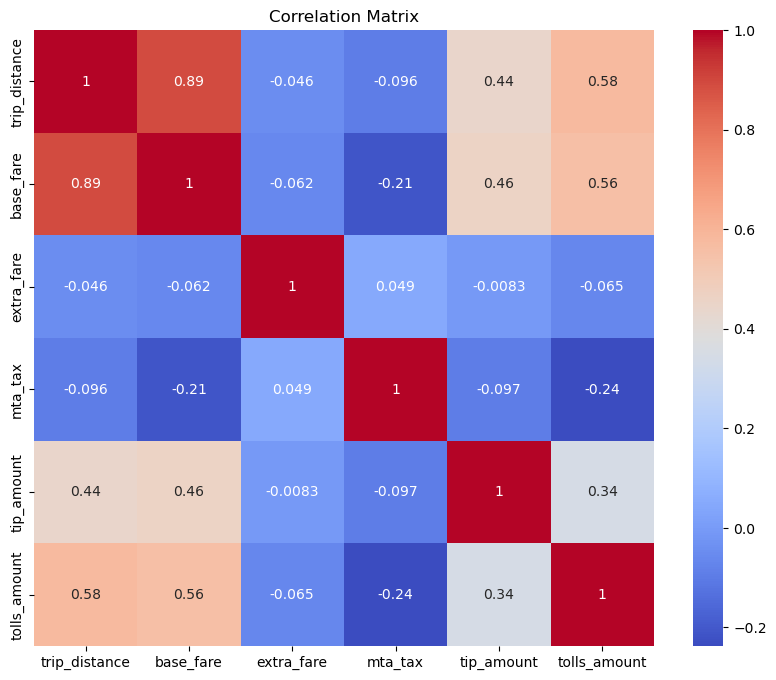

In [22]:
correlation_matrix = df_payment_info[['trip_distance', 'base_fare', 'extra_fare', 'mta_tax', 'tip_amount', 'tolls_amount']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [23]:
#from the pervious matrix we find that the base_fare has a strong relationship with trip_distance, which make sense

In [24]:
df_payment_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332533 entries, 0 to 332532
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   driver_id              332533 non-null  int64         
 1   passenger_id           332533 non-null  int64         
 2   pickup_location_id     332533 non-null  int64         
 3   dropoff_location_id    332533 non-null  int64         
 4   request_datekey        332533 non-null  datetime64[ns]
 5   accept_datekey         332533 non-null  int64         
 6   trip_start_datekey     332533 non-null  int64         
 7   trip_end_datekey       332533 non-null  int64         
 8   s_payment              332533 non-null  int64         
 9   trip_distance          332533 non-null  float64       
 10  base_fare              332533 non-null  float64       
 11  extra_fare             332533 non-null  float64       
 12  mta_tax                332533 non-null  floa

In [25]:
driver_data = df_user[df_user['vehicle_model'] != 'Passenger']
driver_data.head()

,user_id,full_name,email,phone_number,vehicle_id,vehicle_make,vehicle_model,vehicle_year,vehicle_color,vehicle_license_plate,processing_date,record_hash
23368,704153.0,Alan Church,andreaortiz@example.com,(793) 392-3558,109886,Ford,Mustang,1999,White,TYJ 1943,2024-10-14 00:24:25,2de980245de37230abdd3e7c66e74023dc544d5993ff0a...
23369,705005.0,Aaron Romero,smithchristopher@example.net,(355) 577-1322,281447,Nissan,Murano,2000,Yellow,177-XYE,2024-10-14 00:24:25,f3b5d30baa207819649585c56d2228327b58e946c58be1...
23370,705134.0,Alexandria English,marksutton@example.org,(835) 524-9849,152468,Hyundai,Elantra,2016,Orange,297 GKB,2024-10-14 00:24:25,118c18923194ce1ccdcc45120abb1536a34be25ee254d5...
23371,705758.0,Abigail Zavala,julianscott@example.org,(338) 769-5852,3812,BMW,3 Series,1996,Orange,GO4 O2K,2024-10-14 00:24:25,86f6d151c7c5fb5ef9ca9ac13e3699e8ef560c6f5b6235...
23372,705886.0,Alejandro Young,michaelharris@example.org,(436) 853-2080,30532,BMW,Z4,1998,Blue,CYW-5381,2024-10-14 00:24:25,12fba2ca44bcc0733c6edfb9bcc8c5e03d9b67e2c6504f...


C:\Users\abdelrahman mohammed\AppData\Local\Temp\ipykernel_36684\1082879156.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


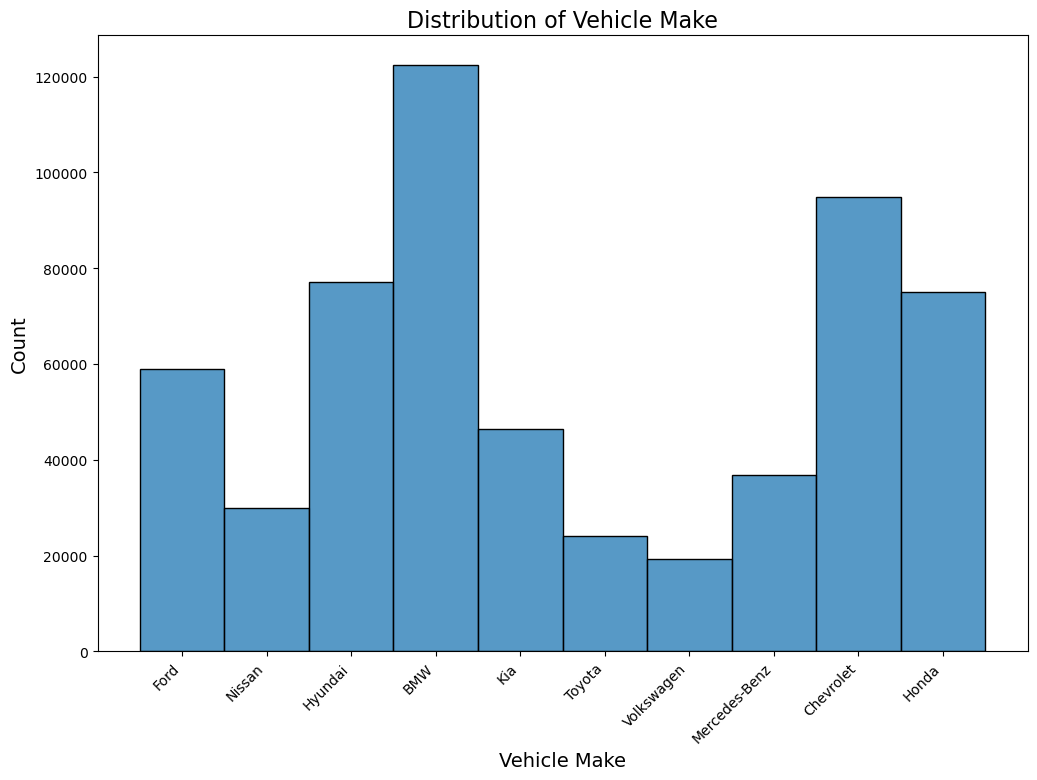

In [26]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create the histogram
ax = sns.histplot(driver_data['vehicle_make'])

# Rotate x-axis labels to prevent overlapping
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Set the title of the plot
plt.title('Distribution of Vehicle Make', fontsize=16)

# Label the x and y axes
plt.xlabel('Vehicle Make', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.show()


In [27]:
driver_data["vehicle_make"].describe()

count     584861
unique        10
top          BMW
freq      122487
Name: vehicle_make, dtype: object

In [28]:
driver_data.head()

,user_id,full_name,email,phone_number,vehicle_id,vehicle_make,vehicle_model,vehicle_year,vehicle_color,vehicle_license_plate,processing_date,record_hash
23368,704153.0,Alan Church,andreaortiz@example.com,(793) 392-3558,109886,Ford,Mustang,1999,White,TYJ 1943,2024-10-14 00:24:25,2de980245de37230abdd3e7c66e74023dc544d5993ff0a...
23369,705005.0,Aaron Romero,smithchristopher@example.net,(355) 577-1322,281447,Nissan,Murano,2000,Yellow,177-XYE,2024-10-14 00:24:25,f3b5d30baa207819649585c56d2228327b58e946c58be1...
23370,705134.0,Alexandria English,marksutton@example.org,(835) 524-9849,152468,Hyundai,Elantra,2016,Orange,297 GKB,2024-10-14 00:24:25,118c18923194ce1ccdcc45120abb1536a34be25ee254d5...
23371,705758.0,Abigail Zavala,julianscott@example.org,(338) 769-5852,3812,BMW,3 Series,1996,Orange,GO4 O2K,2024-10-14 00:24:25,86f6d151c7c5fb5ef9ca9ac13e3699e8ef560c6f5b6235...
23372,705886.0,Alejandro Young,michaelharris@example.org,(436) 853-2080,30532,BMW,Z4,1998,Blue,CYW-5381,2024-10-14 00:24:25,12fba2ca44bcc0733c6edfb9bcc8c5e03d9b67e2c6504f...


In [29]:
# df_payment_info = pd.merge(df_fact_request, df_payment, how='left', left_on='s_payment', right_on='s_payment')
df_payment_info.head()

,driver_id,passenger_id,pickup_location_id,dropoff_location_id,request_datekey,accept_datekey,trip_start_datekey,trip_end_datekey,s_payment,trip_distance,...,tip_amount,tolls_amount,improvement_surcharge,record_hash_x,payment_method_id,method_name,payment_status_id,status_name,processing_date,record_hash_y
0,701949,313,1452,91945,2015-01-02,20150102,20150102,20150102,15,1.78,...,0.0,0.0,0.3,46ddae43081620d90cca5a74689db68c1309b13d87b868...,4,Debit Card,4,Refunded,2024-10-14 00:24:40,e629fa6598d732768f7c726b4b621285f9c3b85303900a...
1,702009,1176,492507,370536,2015-01-11,20150111,20150111,20150111,8,1.84,...,0.0,0.0,0.3,9f400b6274b543381b1ab3b40a3413634d49f2386dfe85...,3,Credit Card,1,Completed,2024-10-14 00:24:40,2c624232cdd221771294dfbb310aca000a0df6ac8b66b6...
2,703511,776,388263,529432,2015-01-14,20150114,20150114,20150114,17,3.52,...,2.0,0.0,0.3,a227e3fc5cb6397183864ed83612323f11411e1071bd22...,5,Google Pay,2,Failed,2024-10-14 00:24:40,4523540f1504cd17100c4835e85b7eefd49911580f8eff...
3,703822,3308,257103,95013,2015-01-12,20150112,20150112,20150112,23,0.90,...,1.5,0.0,0.3,a820fd18e387e6a248e332f0535284e782ade4a83c9ab6...,6,PayPal,4,Refunded,2024-10-14 00:24:40,535fa30d7e25dd8a49f1536779734ec8286108d115da50...
4,705695,3473,157625,43153,2015-01-14,20150114,20150114,20150114,15,1.61,...,1.6,0.0,0.3,3aa36a45ea666b613a3bb24f6561c90cb44251fd8e6847...,4,Debit Card,4,Refunded,2024-10-14 00:24:40,e629fa6598d732768f7c726b4b621285f9c3b85303900a...


In [30]:
data = pd.merge(df_fact_request, driver_data, how='left', left_on='driver_id', right_on='user_id')
data["vehicle_make"].isnull().sum()

0

In [33]:
print(data.columns)

Index(['driver_id', 'passenger_id', 'pickup_location_id',
       'dropoff_location_id', 'request_datekey', 'accept_datekey',
       'trip_start_datekey', 'trip_end_datekey', 's_payment', 'trip_distance',
       'base_fare', 'extra_fare', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'record_hash_x', 'user_id', 'full_name',
       'email', 'phone_number', 'vehicle_id', 'vehicle_make', 'vehicle_model',
       'vehicle_year', 'vehicle_color', 'vehicle_license_plate',
       'processing_date', 'record_hash_y'],
      dtype='object')


## Train-Test split

In [119]:
# Example: Removing data points that are more than 3 standard deviations away from the mean
z_scores = np.abs(stats.zscore(data[['trip_distance', 'base_fare']]))
data = data[(z_scores < 3)]

In [163]:
X = data[["trip_distance"]]
y = data['base_fare']

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [165]:
X_train.shape

(453671, 1)

In [166]:
data.shape

(567089, 29)

In [167]:
y_train.shape

(453671,)

In [168]:
y_test.isnull().count()

113418

In [173]:
X_train = X_train.fillna(X_train.mean())
y_train = y_train.fillna(y_train.mean())

# Impute missing values in the testing set
X_test = X_test.fillna(X_test.mean())
y_test = y_test.fillna(y_test.mean())

In [174]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [175]:
base_fare_pred = model.predict(X_test)

In [176]:
# Calculate performance metrics
mse = mean_squared_error(y_test, base_fare_pred)
rmse = mse ** 0.5

print(f'Root Mean Squared Error: {rmse}')

# Optional: Check model coefficients
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
print(coefficients)

Root Mean Squared Error: 2.57490197794038
         Feature  Coefficient
0  trip_distance     2.841739
